In [1]:
%pylab --no-import-all
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
import datajoint as dj

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pipeline import experiment
from pipeline import ephys
from pipeline import psth
from pipeline import plot

Connecting chris-vathes@mesoscale-activity.datajoint.io:3306


In [8]:
print(psth.UnitGroupPsth().definition)


    -> UnitGroupCondition
    ---
    unit_group_psth:                            longblob
    


In [9]:
psth.UnitGroupCondition()

condition_id,unit_group_condition_id,unit_group_condition_desc,brain_area,selectivity_criteria_id
0,0,audio delay contra hit - global selectivity; ALM,ALM,273
1,1,audio delay ipsi hit - global selectivity; ALM,ALM,273


In [13]:
contra_hit_group_cond_id = {'unit_group_condition_id': 0}

In [14]:
psth.UnitGroupPsth() & contra_hit_group_cond_id

condition_id,unit_group_condition_id,unit_group_psth
0,0,=BLOB=


In [15]:
contra_hit_gpsth = (psth.UnitGroupPsth() & contra_hit_group_cond_id).fetch1()

In [20]:
contra_hit_gpsth['unit_group_psth'].shape

(2,)

In [26]:
contra_hit_gpsth['unit_group_psth'][0].shape, contra_hit_gpsth['unit_group_psth'][0].dtype

((149,), dtype('float64'))

In [27]:
contra_hit_gpsth['unit_group_psth'][1].shape, contra_hit_gpsth['unit_group_psth'][1].dtype

((150,), dtype('float64'))

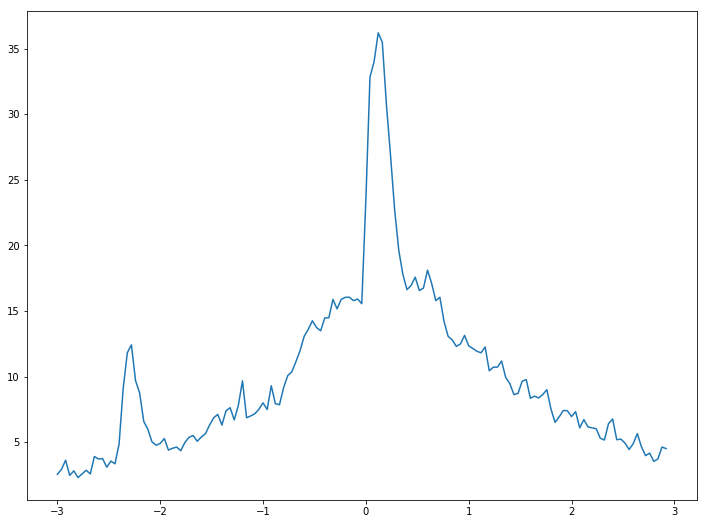

In [31]:
plt.plot(contra_hit_gpsth['unit_group_psth'][1][:-1], contra_hit_gpsth['unit_group_psth'][0])

In [34]:
(psth.UnitGroupPsth.Unit() & contra_hit_group_cond_id)

condition_id,unit_group_condition_id,subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit
0,0,435884,1,1,4
0,0,435884,1,1,63
0,0,435884,1,1,66
0,0,435884,1,1,91
0,0,435884,1,1,165


In [32]:
contra_hit_gpsth_units = (psth.UnitGroupPsth.Unit() & contra_hit_group_cond_id).fetch(as_dict=True)

In [ ]:
plot.unit_psth(my_unit)

In [36]:
for u in contra_hit_gpsth_units:
    print({k: u[k] for k in ephys.Unit.primary_key})

{'subject_id': 435884, 'session': 1, 'electrode_group': 1, 'unit': 4}
{'subject_id': 435884, 'session': 1, 'electrode_group': 1, 'unit': 63}
{'subject_id': 435884, 'session': 1, 'electrode_group': 1, 'unit': 66}
{'subject_id': 435884, 'session': 1, 'electrode_group': 1, 'unit': 91}
{'subject_id': 435884, 'session': 1, 'electrode_group': 1, 'unit': 165}


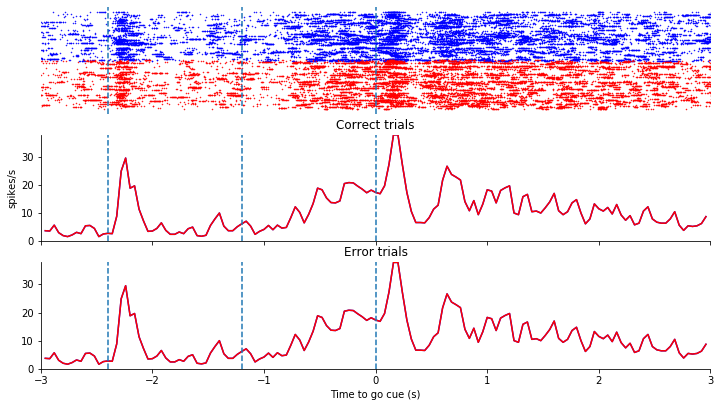

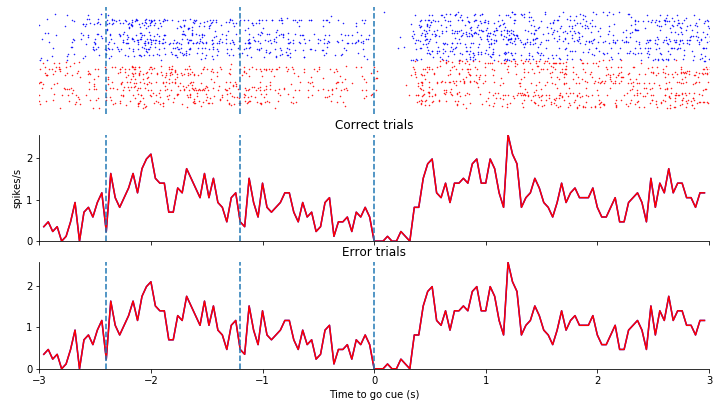

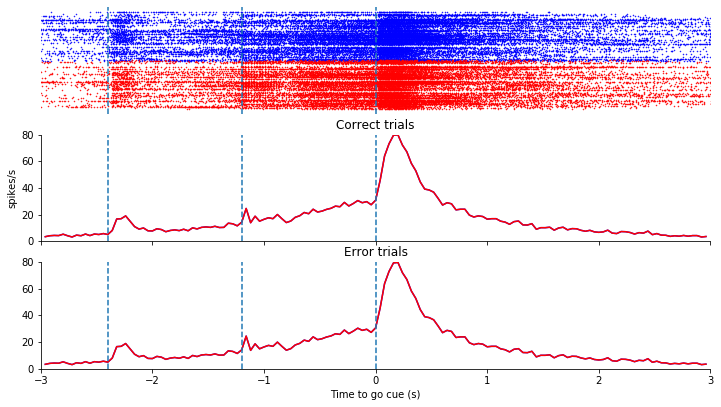

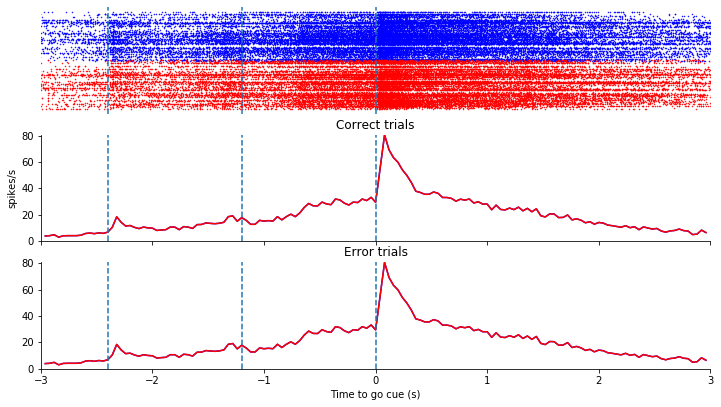

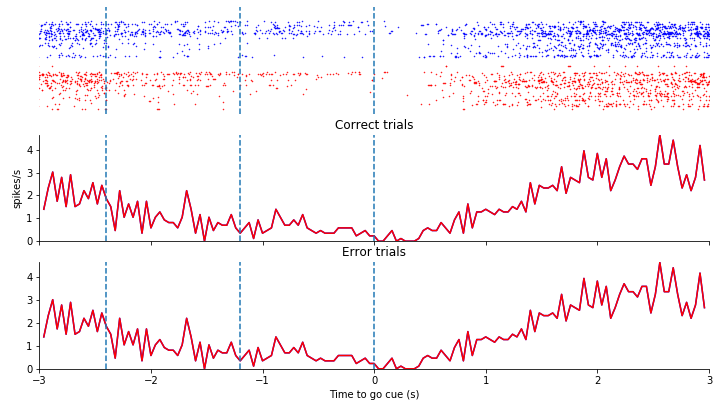

In [38]:
for u in contra_hit_gpsth_units:
    plot.unit_psth(u)